[View in Colaboratory](https://colab.research.google.com/github/astrebeck/ML-Presenting/blob/Test-branch/Astrebeck_Principal_Components_Analysis.ipynb)

# Principal Components Analysis

Principal Components Analysis (PCA) is a matrix-based technique for identifying the most interesting dimensions of a dataset. Mathematically, PCA finds the projection that maximizes the variance of the data. 

Remember the example we've seen of generating points from a normal distribution in $n$ dimensions?

['red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red'
 'red' 'red' 'red' 'red' 'red' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 '

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,0.92,'3d data')

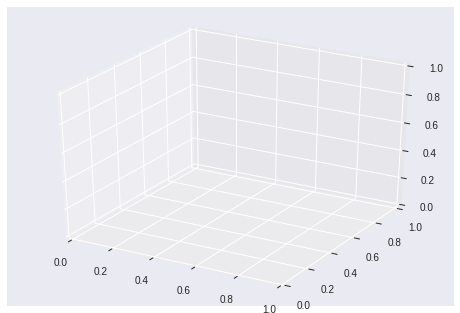

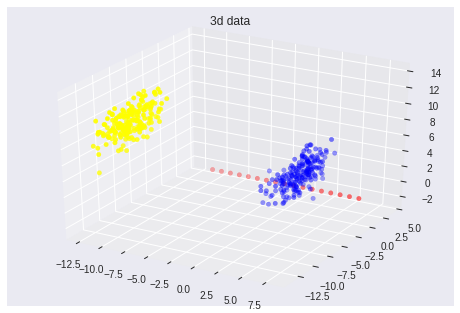

In [1]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.linspace(-8,8,17)
Z = np.repeat(np.array([1,0,0]).reshape(1,3),17,axis=0).T * x

points1 = np.random.multivariate_normal([1,1,1],[[1,0.1,2],[0.1,1,1.5],[1,2,1]],200)
points2 = np.random.multivariate_normal([-10,-10,10],[[1,0.1,2],[0.1,1,1.5],[1,2,1]],200)

colors = np.concatenate([np.repeat('red',17),np.repeat('blue',200),np.repeat('yellow',200)])

print(colors)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

all_points = np.concatenate([Z.T,points1,points2],axis=0)
xa, ya, za = all_points.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xa, ya, za, c=colors)
ax.set_title('3d data')

In [0]:
# set up interactive 3d plot



In $2d$ and $3d$ we can visualize these distributions and intuit them, but what do we do in $15d$, or greater? Frequently there are large numbers of dimensions in a high dimensional dataset that don't contribute much to the shape of the dataset. PCA gives us the ability to expose the covariance of each dimension, which vastly improves visualization techniques and can decrease the dimensionality of a dataset substantially.


In [0]:
# Principal Components Analysis

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
 
model = PCA(n_components=2)
model.fit(all_points)
X_2D = model.transform(all_points)
#print(model.components_)
#print(np.sqrt(model.singular_values_))
#print(model.get_covariance())
xx, xy = X_2D.T
plt.plot(xx,xy,'o')

model = PCA(n_components=3)
model.fit(all_points)
X_3D = model.transform(all_points)
#print(model.components_)
#print(np.sqrt(model.singular_values_))
#print(model.get_covariance())
xx, xy, xz = X_3D.T

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx, xy, xz, c=colors)

In [0]:

# # Principal Components Analysis

# import pandas as pd
# from sklearn.decomposition import PCA

# model = PCA(n_components=2)
# model.fit(data)
# X_2D = model.transform(data)
# print(model.components_)
# print(np.sqrt(model.singular_values_))
# print(model.get_covariance())


# Assignment

Looking back at your carefully prepared and cleaned Titanic data, lets use PCA to look at the 2d and 3d projections of all of the features.

Use the example code above to create a PCA object with 2 components and plot the full 8D Titanic feature set using them. This projection maximizes the variance across all dimensions in your dataset. Without creating new features, this is the best "viewport" into the Titanic data that is available.

Do the same thing with a 3 component PCA and discuss the results.

Finally, experiment with the normalization techniques available in [scikit.preprocessing.normalize](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html) on the original dataset before building your PCA. Does normalization appear to benefit?



## Thinking about your assignment

1. What is PCA, mathematically?
2. What does PCA do to a data set?
3. What "shape" does data have?
4. What steps are in the above PCA example?
5. What steps must I duplicate to apply PCA to Titanic?
6. Where is my Titanic dataset, and how can I use it here effectively?
7. What is my final objective in this assignment?

## imports/ dataframe setup

In [1]:
# Principal Components Analysis

import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize




titanic = sns.load_dataset('titanic')
titanic = titanic.drop(['alive','adult_male','who','class','embark_town'], axis=1)
titanic['embarked'] = titanic['embarked'].fillna(method='ffill')
titanic = titanic.drop(['deck'], axis=1)
titanic['age'] = titanic['age'].fillna(method='ffill')

# Convert binomials and categoricals to encoded labels
for label in ['embarked','sex']:
    titanic[label] = LabelEncoder().fit_transform(titanic[label])
    
    
labels = titanic['survived']
features = titanic.drop(['survived'],axis=1)

# Convert labels to colors
colors = pd.Series(['red','blue'])[labels.values]

#normalize
features_scale  = (features /features.std())

features_normalized  = ((features - features.mean()) /features.std())

features_norm_sk_l1 = normalize(features, norm='l1', axis=0, copy=True, return_norm=False)
features_norm_sk_l2 = normalize(features, norm='l2', axis=0, copy=True, return_norm=False)
features_norm_sk_max = normalize(features, norm='max', axis=0, copy=True, return_norm=False)

print(features_norm_sk_l1)


[[0.00145843 0.0017331  0.00083469 ... 0.00025267 0.00146413 0.        ]
 [0.00048614 0.         0.00144173 ... 0.00248426 0.         0.        ]
 [0.00145843 0.         0.00098645 ... 0.00027619 0.00146413 0.0018622 ]
 ...
 [0.00145843 0.         0.00072087 ... 0.00081725 0.00146413 0.        ]
 [0.00048614 0.0017331  0.00098645 ... 0.00104552 0.         0.0018622 ]
 [0.00145843 0.0017331  0.00121409 ... 0.00027009 0.00073206 0.0018622 ]]


## Lets Try this first without normalized data

In [0]:
model = PCA(n_components=2)
model.fit(features)
X_2D = model.transform(features)
print(model.components_)
# print(np.sqrt(model.singular_values_))
# print(model.get_covariance())

print(X_2D.shape)

xT, yT = X_2D.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xT, yT, c=colors)
ax.set_title('2d data')
plt.show()

In [0]:
model = PCA(n_components=3)
model.fit(features)
X_2D = model.transform(features)
# print(model.components_)
# print(np.sqrt(model.singular_values_))
# print(model.get_covariance())

# print(X_2D.shape)

print(model.explained_variance_ratio_) 

xT, yT, zT = X_2D.T

print(type(X_2D))

import IPython
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

configure_plotly_browser_state()
init_notebook_mode(connected=False)


trace1 = go.Scatter3d(
    x=xT,
    y=yT,
    z=zT,
    mode='markers',
    marker=dict(
        color= colors,
        size=3,
        opacity=0.9
    )
)

fig = go.Figure(data=[trace1])
iplot(fig)

## Now lets see the difference with just scaling the data

In [0]:
model = PCA(n_components=2)
model.fit(features_scale)
X_2D = model.transform(features_scale)
print(model.components_)
# print(np.sqrt(model.singular_values_))
# print(model.get_covariance())

print(X_2D.shape)

xT, yT = X_2D.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xT, yT, c=colors)
ax.set_title('2d data')
plt.show()



In [0]:
model = PCA(n_components=3)
model.fit(features_scale)
X_2D = model.transform(features_scale)
# print(model.components_)
# print(np.sqrt(model.singular_values_))
# print(model.get_covariance())

# print(X_2D.shape)

print(model.explained_variance_ratio_) 

xT, yT, zT = X_2D.T

import IPython
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

configure_plotly_browser_state()
init_notebook_mode(connected=False)


trace1 = go.Scatter3d(
    x=xT,
    y=yT,
    z=zT,
    mode='markers',
    marker=dict(
        color= colors,
        size=3,
        opacity=0.9
    )
)

fig = go.Figure(data=[trace1])
iplot(fig)

## Now with normilzed with mean and std

In [0]:
model = PCA(n_components=2)
model.fit(features_normalized)
X_2D = model.transform(features_normalized)
print(model.components_)
# print(np.sqrt(model.singular_values_))
# print(model.get_covariance())

print(X_2D.shape)

xT, yT = X_2D.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xT, yT, c=colors)
ax.set_title('2d data')
plt.show()



In [0]:
model = PCA(n_components=3)
model.fit(features_normalized)
X_2D = model.transform(features_normalized)
# print(model.components_)
# print(np.sqrt(model.singular_values_))
# print(model.get_covariance())

# print(X_2D.shape)

print(model.explained_variance_ratio_) 

xT, yT, zT = X_2D.T

import IPython
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

configure_plotly_browser_state()
init_notebook_mode(connected=False)


trace1 = go.Scatter3d(
    x=xT,
    y=yT,
    z=zT,
    mode='markers',
    marker=dict(
        color= colors,
        size=3,
        opacity=0.9
    )
)

fig = go.Figure(data=[trace1])
iplot(fig)

## Next lets use scikit to normailze the data with L1


In [0]:
model = PCA(n_components=2)
model.fit(features_norm_sk_l1)
X_2D = model.transform(features_norm_sk_l1)
print(model.components_)
# print(np.sqrt(model.singular_values_))
# print(model.get_covariance())

print(X_2D.shape)

xT, yT = X_2D.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xT, yT, c=colors)
ax.set_title('2d data')
plt.show()



In [0]:
model = PCA(n_components=3)
model.fit(features_norm_sk_l1)
X_2D = model.transform(features_norm_sk_l1)
# print(model.components_)
# print(np.sqrt(model.singular_values_))
# print(model.get_covariance())

# print(X_2D.shape)

print(model.explained_variance_ratio_) 

xT, yT, zT = X_2D.T

import IPython
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

configure_plotly_browser_state()
init_notebook_mode(connected=False)


trace1 = go.Scatter3d(
    x=xT,
    y=yT,
    z=zT,
    mode='markers',
    marker=dict(
        color= colors,
        size=3,
        opacity=0.9
    )
)

fig = go.Figure(data=[trace1])
iplot(fig)

## Next lets use scikit to normailze the data with L2


In [0]:
model = PCA(n_components=2)
model.fit(features_norm_sk_l2)
X_2D = model.transform(features_norm_sk_l2)
print(model.components_)
# print(np.sqrt(model.singular_values_))
# print(model.get_covariance())

print(X_2D.shape)

xT, yT = X_2D.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xT, yT, c=colors)
ax.set_title('2d data')
plt.show()



In [0]:
model = PCA(n_components=3)
model.fit(features_norm_sk_l2)
X_2D = model.transform(features_norm_sk_l2)
# print(model.components_)
# print(np.sqrt(model.singular_values_))
# print(model.get_covariance())

# print(X_2D.shape)

print(model.explained_variance_ratio_) 

xT, yT, zT = X_2D.T

import IPython
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

configure_plotly_browser_state()
init_notebook_mode(connected=False)


trace1 = go.Scatter3d(
    x=xT,
    y=yT,
    z=zT,
    mode='markers',
    marker=dict(
        color= colors,
        size=3,
        opacity=0.9
    )
)

fig = go.Figure(data=[trace1])
iplot(fig)

## Next lets use scikit to normailze the data with 'Max'


In [0]:
model = PCA(n_components=2)
model.fit(features_norm_sk_max)
X_2D = model.transform(features_norm_sk_max)
print(model.components_)
# print(np.sqrt(model.singular_values_))
# print(model.get_covariance())

print(X_2D.shape)

xT, yT = X_2D.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xT, yT, c=colors)
ax.set_title('2d data')
plt.show()



In [0]:
model = PCA(n_components=3)
model.fit(features_norm_sk_max)
X_2D = model.transform(features_norm_sk_max)
# print(model.components_)
# print(np.sqrt(model.singular_values_))
# print(model.get_covariance())

# print(X_2D.shape)

print(model.explained_variance_ratio_) 

xT, yT, zT = X_2D.T

import IPython
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

configure_plotly_browser_state()
init_notebook_mode(connected=False)


trace1 = go.Scatter3d(
    x=xT,
    y=yT,
    z=zT,
    mode='markers',
    marker=dict(
        color= colors,
        size=3,
        opacity=0.9
    )
)

fig = go.Figure(data=[trace1])
iplot(fig)

# Stretch Goal

## Eigenfaces

One of the most interesting ways to understand PCA involves image processing. As you know, every image is in fact a single high dimensional point where each pixel is a dimension of the point. When presented with a collection of $m$ images in $n$ dimensions, where $n$ is the number of pixels per image, PCA produces a very interesting set of components.

The first component, know is the first eigenvector, is the set of most frequent characteristics of a face from this dataset. Every face starts with this eigenface, then adds components of the other eigenfaces to produce each unique face.

In [2]:
!wget http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.zip -O att_faces.zip
!unzip att_faces.zip

--2018-04-19 23:28:46--  http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.zip
Resolving www.cl.cam.ac.uk (www.cl.cam.ac.uk)... 128.232.0.20, 2001:630:212:200::80:14
Connecting to www.cl.cam.ac.uk (www.cl.cam.ac.uk)|128.232.0.20|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www.cl.cam.ac.uk/research/dtg/attarchive/pub/data/att_faces.zip [following]
--2018-04-19 23:28:46--  http://www.cl.cam.ac.uk/research/dtg/attarchive/pub/data/att_faces.zip
Reusing existing connection to www.cl.cam.ac.uk:80.
HTTP request sent, awaiting response... 200 OK
Length: 3769022 (3.6M) [application/zip]
Saving to: ‘att_faces.zip’

att_faces.zip       100%[===================>]   3.59M  3.21MB/s    in 1.1s    

2018-04-19 23:28:48 (3.21 MB/s) - ‘att_faces.zip’ saved [3769022/3769022]

Archive:  att_faces.zip
replace README? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

image_list = np.empty((1,10304))
                        
for x in range(40):
    
    for y in range(10):
        
        img_string = "s" + str(x+1) + "/" + str(y+1) + ".pgm"
           
        append_img = imread(img_string).reshape((1,-1))
        
              
        image_list = np.vstack((image_list, append_img ))
        
image_list = np.delete(image_list, 0,0)

print(image_list)

[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [125. 119. 124. ...  36.  39.  40.]
 [119. 120. 120. ...  89.  94.  85.]
 [125. 124. 124. ...  36.  35.  34.]]


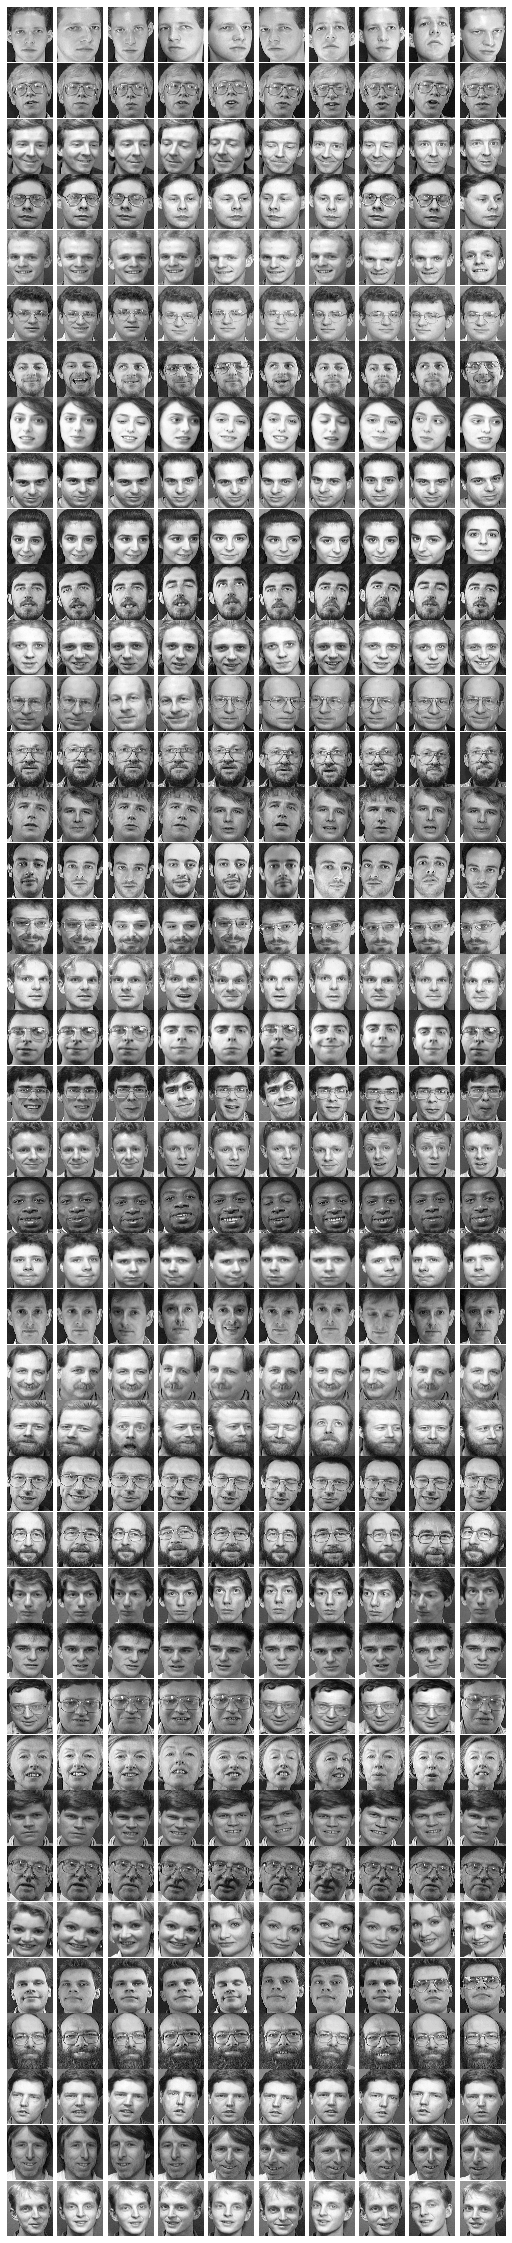

In [25]:
fig, axes = plt.subplots(40,10,figsize=(9,41),
            subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(image_list[i,:].reshape(112,92),cmap="gray")

In [22]:
#PCA on image data

pca_image = image_list

print(pca_image.shape)

model = PCA(n_components=0.8)
model.fit(pca_image)


print(face_array.shape)



(400, 10304)
(10304,)


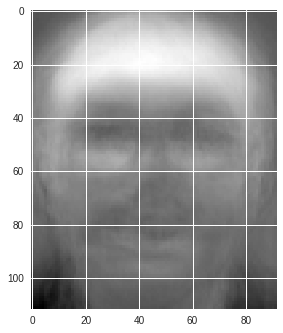

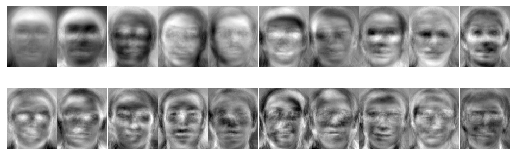

In [34]:
from scipy.misc import imread
import matplotlib.pyplot as plt
img = model.components_[0]
img = img.reshape(112,92)

plt.imshow(img,cmap='gray')

fig, axes = plt.subplots(2,10,figsize=(9,3),
            subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(model.components_[i].reshape(112,92),cmap="gray")

![AT&T](https://www.dropbox.com/s/w9cvhuzyamme68q/Screenshot%202018-04-17%2015.01.38.png?raw=1)